In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
import statsmodels
from statsmodels.tsa.stattools import adfuller
import time
import math 


# read train data file 
df_train = pd.read_csv(r'data/tempfeature_train_split2018-01-01.csv')
# set date as index
df_train = df_train.set_index('Unnamed: 0')
display(df_train)

,RAY_feature0,RAY_feature1,QQQ_feature0,QQQ_feature1,QQQ_feature2,T10Y3M_feature0,T10Y3M_feature1,CL1_feature0,CL1_feature1,HG1_feature0,...,XAG_feature0,XAG_feature1,VNQ_feature0,VNQ_feature1,EURtoUSD_feature0,EURtoUSD_feature1,EEM_feature0,EEM_feature1,VIX_feature0,VIX_feature1
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2006-11-20,0.885324,0.623950,1.459508,0.776773,0.695967,1.682670,0.682430,0.940578,1.529239,0.709452,...,0.818557,1.420594,0.759136,0.762117,1.401735,1.595564,2.366925,0.623210,2.006362,0.722545
2006-11-21,0.964767,0.662617,1.361366,0.838592,0.541879,1.783971,0.709804,1.024910,1.405953,0.722956,...,0.759346,1.496068,0.716507,0.852777,1.373349,1.662168,2.397174,0.631091,2.021739,0.704223
2006-11-22,1.141544,0.779493,1.408920,0.875384,0.565303,1.856760,0.699308,1.046798,1.382187,0.729090,...,0.719490,1.395972,0.757292,0.886103,1.044487,1.326920,2.449411,0.632879,1.980979,0.673374
2006-11-23,1.018305,0.642769,1.496243,0.626023,0.937911,2.689592,1.147392,1.126029,1.336662,0.739020,...,0.808542,1.350528,0.641696,1.059983,1.033326,1.437399,2.454318,0.654184,1.949406,0.659092
2006-11-24,0.873695,0.648454,1.223600,0.629167,0.742482,2.750116,1.268049,1.121907,1.264566,0.693209,...,0.868634,1.395759,0.716777,1.083507,0.908714,1.202280,2.478807,0.658989,1.898560,0.616410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25,0.919329,0.990031,1.068843,0.860211,0.595686,1.150398,1.891270,1.897113,0.724838,1.394268,...,0.857448,1.257620,1.088082,0.561691,0.930235,1.254605,1.425323,1.244799,0.840293,1.350324
2017-12-26,0.861703,1.002830,1.081094,0.703996,1.012427,0.251600,1.823043,1.932922,0.763409,1.376117,...,0.514949,1.306003,1.080449,0.490428,0.932207,1.240229,1.398429,1.250917,0.806610,1.292876
2017-12-27,0.957542,1.137638,0.836009,0.801175,0.766293,0.207976,1.834725,1.881135,0.696486,1.446887,...,0.504760,1.403311,1.064722,0.460485,0.882476,1.278914,1.345210,1.230968,0.835064,1.246334


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#train for best model, from k = 2 to 10, each k train 5 time
best_score = -1
for k in range(2,11):
    for i in range(5):
        model = KMeans(n_clusters=k)
        ypred = model.fit_predict(df_train)
        score = silhouette_score(df_train, ypred, metric='euclidean')
        if score >= best_score:
            best_score = score
            best_k = k
            best_model = model
            best_ypred = ypred
    print(score)

0.20674741871821775
0.18465632902459353
0.1606229503583387
0.15644314367465967
0.1595631561601155
0.1526084771879071
0.13700560765642414
0.14026890647134238
0.13964134580118118


In [6]:
label_df = pd.DataFrame(best_ypred,index = df_train.index,columns=['label'])

In [7]:
label_df

,label
Unnamed: 0,
2006-11-20,1
2006-11-21,1
2006-11-22,1
2006-11-23,1
2006-11-24,1
...,...
2017-12-25,1
2017-12-26,1
2017-12-27,1


In [9]:
# import original data
# read train data file 
df_original = pd.read_csv(r'data/rawData_Feb11.csv')
df_original.set_index('Date',inplace=True)

In [10]:
#forward fill
df_original.ffill(inplace=True)
df_original.drop(columns=['VXUS'],inplace=True)
display(df_original)

,RAY,VIX,QQQ,T10Y3M,CL1,HG1,GC1,XAG,VNQ,EURtoUSD,EEM
Date,,,,,,,,,,,
1990-01-02,200.241,17.24,NaN,0.11,NaN,NaN,NaN,NaN,NaN,1.2146,NaN
1990-01-03,200.116,18.19,NaN,0.10,NaN,NaN,NaN,NaN,NaN,1.2096,NaN
1990-01-04,198.646,19.22,NaN,0.14,NaN,NaN,NaN,NaN,NaN,1.2287,NaN
1990-01-05,196.850,20.11,NaN,0.20,NaN,NaN,NaN,NaN,NaN,1.2358,NaN
1990-01-08,197.525,20.26,NaN,0.23,NaN,NaN,NaN,NaN,NaN,1.2452,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-07,2631.460,23.00,363.72,1.57,88.21,443.1,1798.5,22.644,105.86,1.1266,48.56
2022-02-08,2631.460,23.00,363.72,1.57,88.21,443.1,1798.5,22.644,105.86,1.1266,49.03
2022-02-09,2631.460,23.00,363.72,1.57,88.21,443.1,1798.5,22.644,105.86,1.1266,49.80


In [13]:
df_original = df_original.pct_change()

In [15]:
df_original

,RAY,VIX,QQQ,T10Y3M,CL1,HG1,GC1,XAG,VNQ,EURtoUSD,EEM
Date,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,-0.000624,0.055104,NaN,-0.090909,NaN,NaN,NaN,NaN,NaN,-0.004117,NaN
1990-01-04,-0.007346,0.056625,NaN,0.400000,NaN,NaN,NaN,NaN,NaN,0.015790,NaN
1990-01-05,-0.009041,0.046306,NaN,0.428571,NaN,NaN,NaN,NaN,NaN,0.005778,NaN
1990-01-08,0.003429,0.007459,NaN,0.150000,NaN,NaN,NaN,NaN,NaN,0.007606,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-07,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,-0.002055
2022-02-08,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.009679
2022-02-09,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.015705


label
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: RAY, dtype: object

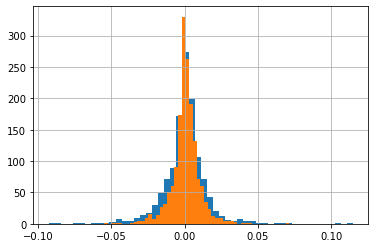

In [18]:
latest_valid = max([df_original[col].first_valid_index() for col in df_original])
df_original = df_original.loc[latest_valid: '2018-01-01'].dropna()
merged_df = pd.merge(df_original, label_df, how = 'inner', left_index=True,right_index=True)
merged_df.groupby('label')['RAY'].hist(bins=50)

In [19]:
merged_df.groupby('label')['RAY'].mean()

label
0   -0.000177
1    0.000674
Name: RAY, dtype: float64

In [20]:
merged_df.groupby('label')['RAY'].std()

label
0    0.015726
1    0.009612
Name: RAY, dtype: float64

In [ ]:
train_label=pd.concat([df_train,label_df],axis=1)
display(train_label)

In [ ]:
train_label.to_csv(root+'/2018_train_labels')